# Initialize and cleaning of play-by-play data

## Load the data

In [25]:
#Imports
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# import os
# import scipy
# import urllib.request
# from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# import matplotlib as mpl
# from scipy.interpolate import make_interp_spline, BSpline
# from adjustText import adjust_text

%config InlineBackend.figure_format = 'retina'

In [26]:
#hardcode colors
colors = {
    'ARI':'#97233F',
    'ATL':'#A71930',
    'BAL':'#241773',
    'BUF':'#00338D',
    'CAR':'#0085CA',
    'CHI':'#C83803',
    'CIN':'#FB4F14',
    'CLE':'#311D00',
    'DAL':'#041E42',
    'DEN':'#FB4F14',
    'DET':'#0076B6',
    'GB' :'#203731',
    'HOU':'#03202F',
    'IND':'#002C5F',
    'JAX':'#006778',
    'KC' :'#E31837',
    'LAC':'#0080C6',
    'LAR':'#866D4B',
    'MIA':'#008E97',
    'MIN':'#4F2683',
    'NE' :'#002244',
    'NO' :'#D3BC8D',
    'NYG':'#0B2265',
    'NYJ':'#125740',
    'OAK':'#A5ACAF',
    'PHI':'#004C54',
    'PIT':'#FFB612',
    'SEA':'#69BE28',
    'SF' :'#AA0000',
    'TB' :'#D50A0A',
    'TEN':'#0C2340',
    'WAS':'#773141'
}

kc_p = '#E31837'
kc_s = '#FFB81C'

In [27]:
#load data
data = pd.read_csv('clean_pbp_2019_wk20.csv',low_memory=False)

# Analysis

In [28]:
#some minor feature engineering
data.loc[data['interception']==1, 'complete_pass'] = 0
data['cpoe'] = data['complete_pass'] - data['cp']

In [29]:
#Fixing old team naming conventions
data.loc[(data['posteam']=='LA'),'posteam'] = 'LAR'
data.loc[(data['posteam']=='SD'),'posteam'] = 'LAC'
data.loc[(data['posteam']=='JAC'),'posteam'] = 'JAX'
data.loc[(data['posteam']=='STL'),'posteam'] = 'LAR'

In [42]:
#Get all interceptions
ints = data.loc[(data['interception']==1)]
#Group by season
qb_ints = ints.groupby(by=['passer_player_name','posteam','season'])['air_yards','epa'].sum()
qb_ints['count'] = ints.groupby(by=['passer_player_name','posteam','season'])['epa'].count()
qb_ints.sort_values(by='count', ascending=False, inplace=True)
qb_ints.reset_index(inplace=True)

#Regroup to get a count of how many seasons
qb_ints2 = qb_ints.groupby(by=['passer_player_name','posteam'])['air_yards','epa','count'].sum()
qb_ints2['seasons'] = qb_ints.groupby(by=['passer_player_name','posteam'])['count'].count()
qb_ints2.sort_values(by='count', ascending=False, inplace=True)
qb_ints2.reset_index(inplace=True)
#Only get QBs with 3 or more seasons in the dataset
qb_ints2 = qb_ints2.loc[(qb_ints2['seasons']>=3)]
qb_ints2

,passer_player_name,posteam,air_yards,epa,count,seasons
0,E.Manning,NYG,2356.0,-724.096565,166,11
1,P.Rivers,LAC,2755.0,-640.255718,148,11
2,D.Brees,NO,2399.0,-603.393473,140,11
3,M.Ryan,ATL,2109.0,-556.169796,131,11
4,M.Stafford,DET,1786.0,-560.910923,124,11
...,...,...,...,...,...,...
136,M.McGloin,OAK,84.0,-44.240354,9,3
139,L.Jones,PIT,143.0,-30.119171,8,3
140,C.Batch,PIT,134.0,-29.947125,8,3
149,C.McCoy,WAS,100.0,-28.336995,7,3


In [43]:
qbs=qb_ints2

No handles with labels found to put in legend.


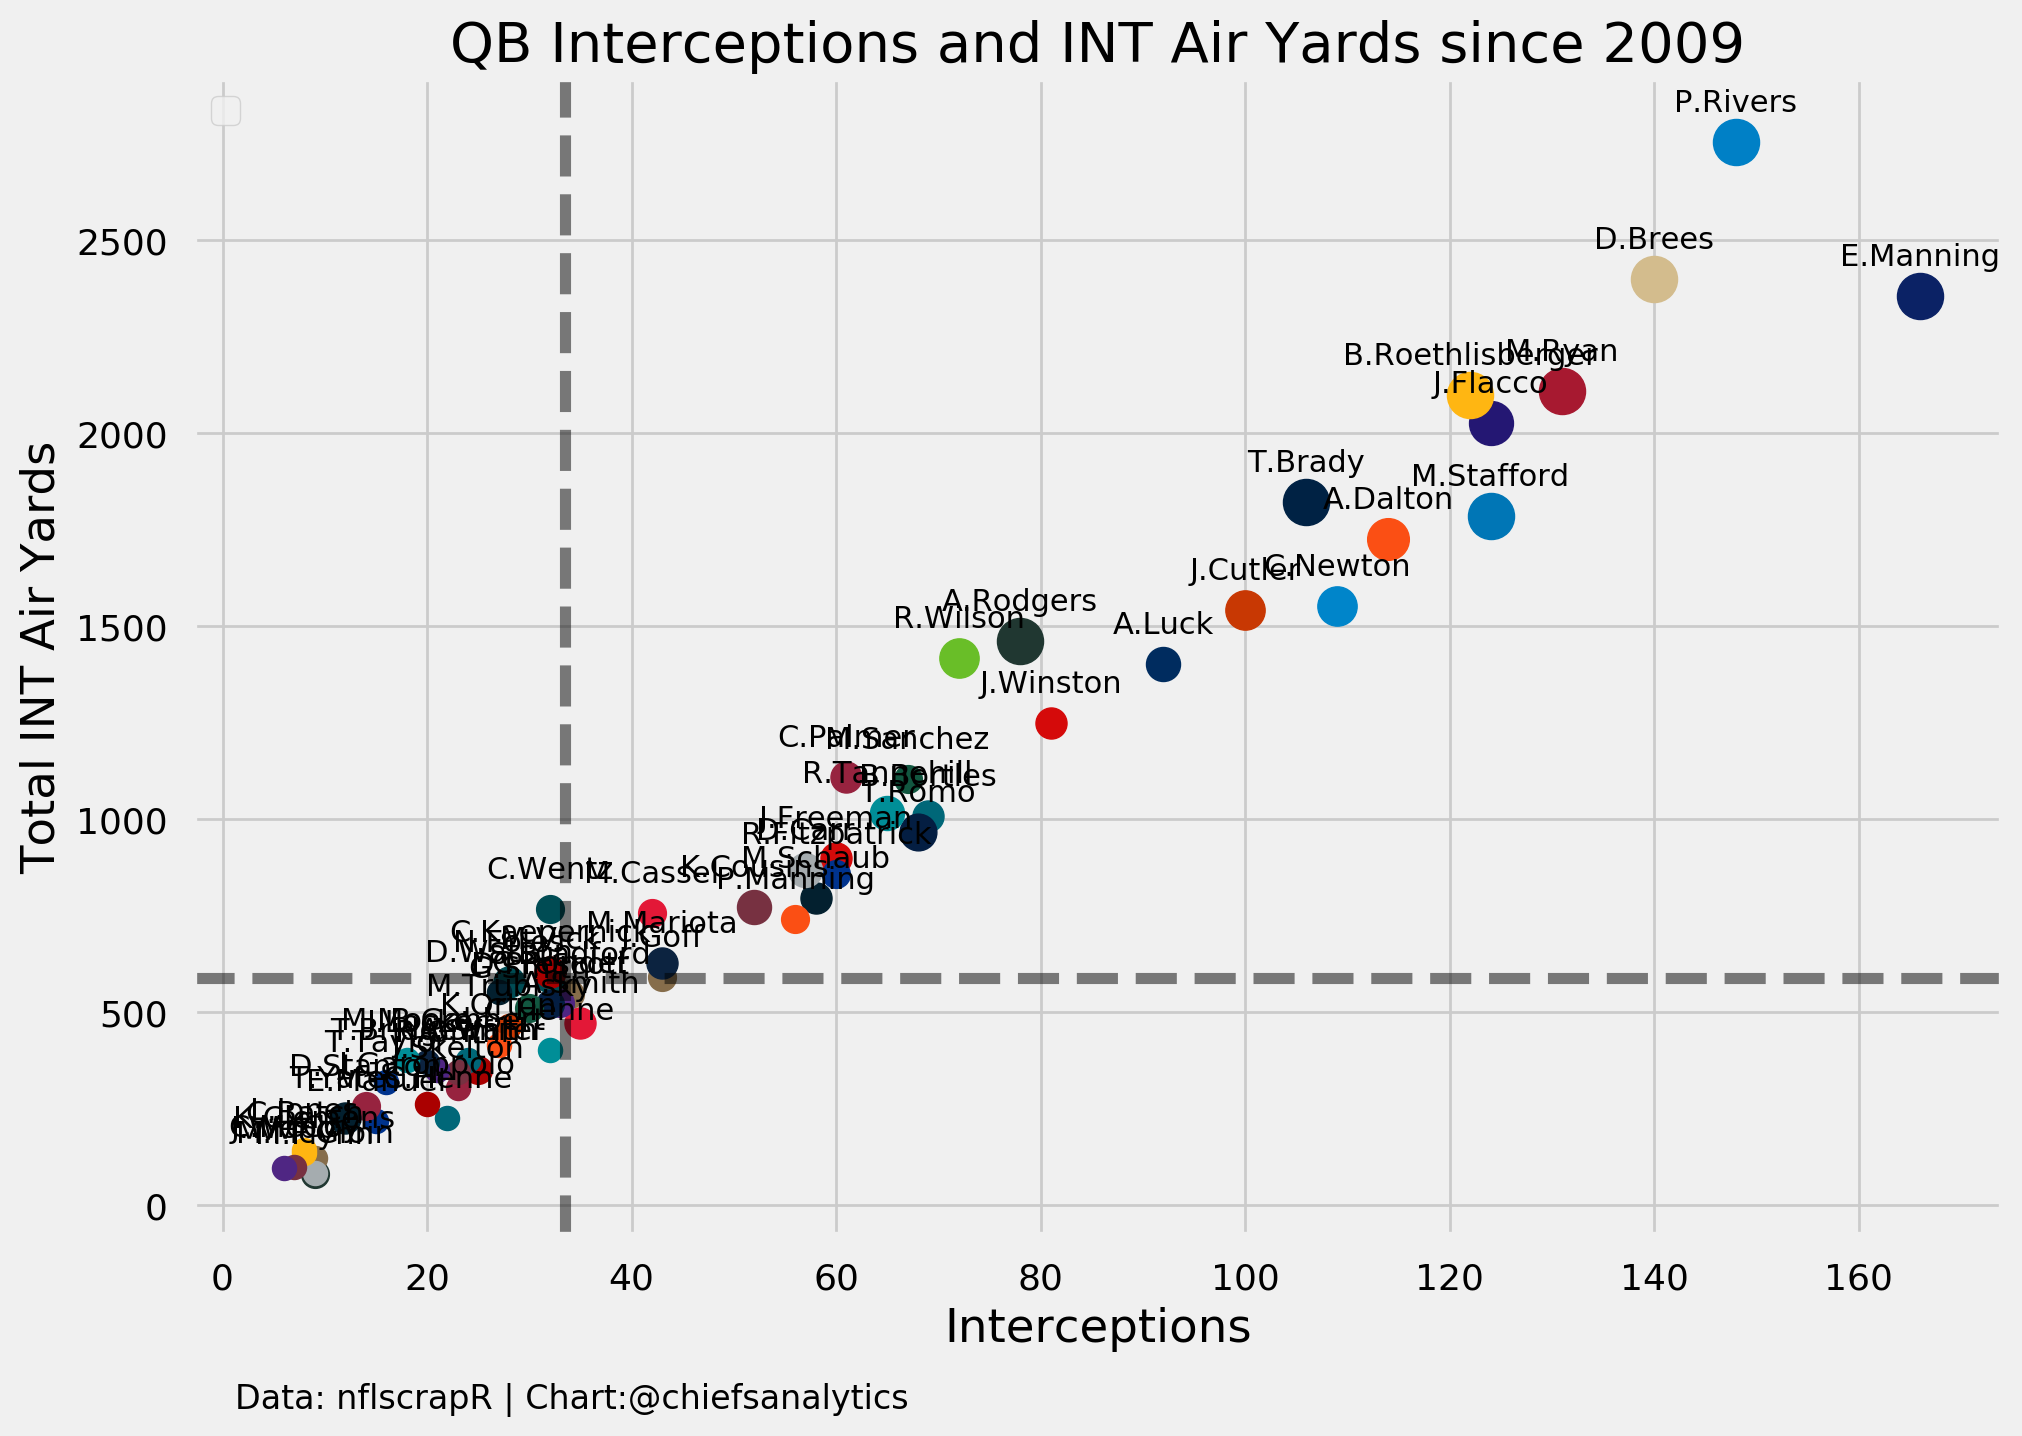

In [49]:
#Plotting
plt.style.use('default')
plt.style.use('seaborn-talk')
plt.style.use('fivethirtyeight')
#Plot 50th% of our variables
plt.axvline(qbs['count'].median(),ls='--',c='k',alpha=0.5)
plt.axhline(qbs['air_yards'].median(),ls='--',c='k',alpha=0.5)

#Loop to plot each QB - this isn't at all necessary, but i keep this structure for when I am doing team color plots
for index,qb in qbs.iterrows():
    if qb['passer_player_name']=='P.Mahomes':
        continue
    plt.scatter(qb['count'], qb['air_yards'], c=colors[qb['posteam']],
                s=qb['seasons']*25, alpha=1)
    plt.annotate(qb['passer_player_name'], # this is the text
            (qb['count'],qb['air_yards']), # this is the point to label
            textcoords="offset points", # how to position the text
            xytext=(0,11), # distance from text to points (x,y)
            ha='center',fontsize = 11,
            alpha=1) # horizontal alignment can be left, right or center     


#Title, labels
plt.title('QB Interceptions and INT Air Yards since 2009')
plt.ylabel('Total INT Air Yards')
plt.xlabel('Interceptions')
txt = "Data: nflscrapR | Chart:@chiefsanalytics"
plt.figtext(0.1, -0.05, txt, wrap=True, horizontalalignment='left', fontsize=12)
plt.legend(loc='upper left')